Tamil Hate Speech

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv('AWT_train.csv')

In [47]:
data

,Text,Class
0,இதல்லம் ஒரு தீர்ப்பு நாட்டாமை தீர்ப்பை மற்று,Non-Abusive
1,"யாருடா அந்த கார்த்தி, நீ எங்கடா இருக்க ?",Non-Abusive
2,இரண்டு பேரின் (புண்டையை) சாமான்களை கோணிய ஊசால்...,Abusive
3,என்ன திமிர் இந்த பொண்ணுக்கு.....மக்களே இன்னும்...,Abusive
4,ஐயோ அந்த கார்த்திக் எ காட்டுங்க பா please,Non-Abusive
...,...,...
2785,ரெண்டுமே அவனா இல்ல அவளா....ஒரே கன்ஃப்யூசன்.......,Abusive
2786,ராஜேஷ்வரி செம்மயா இருக்கு ரொம்ப குளோசப்ல பார்க...,Abusive
2787,எனக்கு தெறிச்சு கார்த்தி னு ஒருத்தன் நல்லா ஓத்...,Abusive
2788,நீங்கள் கவலை கொல்லாதீர்கள் சகோதரி. சின்மை எவ்ள...,Abusive


In [48]:
df = pd.DataFrame(data)

<Axes: xlabel='Class', ylabel='count'>

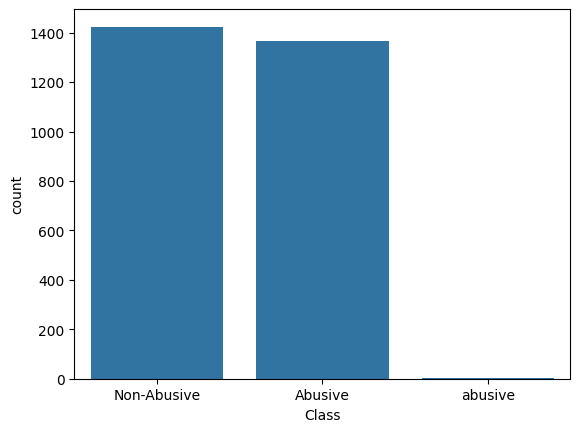

In [49]:
sns.countplot(df,x='Class')

In [50]:
find_abusive = df[df['Class'] == 'abusive']

In [51]:
find_abusive

,Text,Class
1067,ஏம்மா லெட்சுமி ராமகிருஸ்ணன் உனக்கு தயாரிப்பாளர...,abusive


In [52]:
df.drop(1067, inplace = True)

In [53]:
df

,Text,Class
0,இதல்லம் ஒரு தீர்ப்பு நாட்டாமை தீர்ப்பை மற்று,Non-Abusive
1,"யாருடா அந்த கார்த்தி, நீ எங்கடா இருக்க ?",Non-Abusive
2,இரண்டு பேரின் (புண்டையை) சாமான்களை கோணிய ஊசால்...,Abusive
3,என்ன திமிர் இந்த பொண்ணுக்கு.....மக்களே இன்னும்...,Abusive
4,ஐயோ அந்த கார்த்திக் எ காட்டுங்க பா please,Non-Abusive
...,...,...
2785,ரெண்டுமே அவனா இல்ல அவளா....ஒரே கன்ஃப்யூசன்.......,Abusive
2786,ராஜேஷ்வரி செம்மயா இருக்கு ரொம்ப குளோசப்ல பார்க...,Abusive
2787,எனக்கு தெறிச்சு கார்த்தி னு ஒருத்தன் நல்லா ஓத்...,Abusive
2788,நீங்கள் கவலை கொல்லாதீர்கள் சகோதரி. சின்மை எவ்ள...,Abusive


<Axes: xlabel='Class', ylabel='count'>

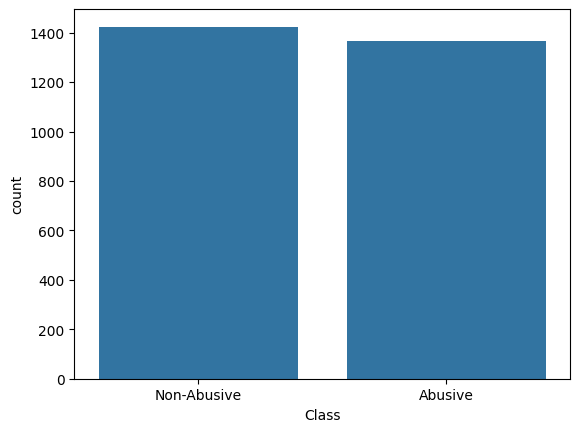

In [54]:
sns.countplot(df,x='Class')

In [55]:
import re

def clean_text(text):
    text = re.sub(r'[^\u0B80-\u0BFF\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [56]:
df['Text'] = df['Text'].apply(clean_text)

In [57]:
df

,Text,Class
0,இதல்லம் ஒரு தீர்ப்பு நாட்டாமை தீர்ப்பை மற்று,Non-Abusive
1,யாருடா அந்த கார்த்தி நீ எங்கடா இருக்க,Non-Abusive
2,இரண்டு பேரின் புண்டையை சாமான்களை கோணிய ஊசால் த...,Abusive
3,என்ன திமிர் இந்த பொண்ணுக்குமக்களே இன்னும் இவளு...,Abusive
4,ஐயோ அந்த கார்த்திக் எ காட்டுங்க பா,Non-Abusive
...,...,...
2785,ரெண்டுமே அவனா இல்ல அவளாஒரே கன்ஃப்யூசன் கஷ்டம் ...,Abusive
2786,ராஜேஷ்வரி செம்மயா இருக்கு ரொம்ப குளோசப்ல பார்க...,Abusive
2787,எனக்கு தெறிச்சு கார்த்தி னு ஒருத்தன் நல்லா ஓத்...,Abusive
2788,நீங்கள் கவலை கொல்லாதீர்கள் சகோதரி சின்மை எவ்ளோ...,Abusive


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, TFAutoModel
import tensorflow as tf
import numpy as np

In [59]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [60]:
X = df['Text']
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
muril_model = TFAutoModel.from_pretrained("google/muril-base-cased")

Some layers from the model checkpoint at google/muril-base-cased were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['bert/pooler/dense/kernel:0', 'bert/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
max_length = 128
X_train_tokens = tokenizer(list(X_train), max_length=max_length, truncation=True, padding=True, return_tensors="tf")
X_test_tokens = tokenizer(list(X_test), max_length=max_length, truncation=True, padding=True, return_tensors="tf")

In [63]:
input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

In [64]:
embeddings = muril_model(input_ids=input_ids, attention_mask=attention_mask)[0]
cls_token = embeddings[:, 0, :]
output = tf.keras.layers.Dense(1, activation="sigmoid")(cls_token)

In [65]:
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [66]:
model.fit(
    [X_train_tokens['input_ids'], X_train_tokens['attention_mask']],
    y_train,
    validation_data=([X_test_tokens['input_ids'], X_test_tokens['attention_mask']], y_test),
    epochs=2,
    batch_size=16
)

Epoch 1/2


140/140 [==============================] - 118s 527ms/step - loss: 0.6767 - accuracy: 0.5800 - val_loss: 0.6055 - val_accuracy: 0.7151
Epoch 2/2
140/140 [==============================] - 65s 467ms/step - loss: 0.6536 - accuracy: 0.6333 - val_loss: 0.6120 - val_accuracy: 0.6971


In [67]:
y_pred = model.predict([X_test_tokens['input_ids'], X_test_tokens['attention_mask']])
y_pred = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

18/18 [==============================] - 8s 274ms/step
Accuracy: 0.6971326164874552
Precision: 0.8152173913043478
F1 Score: 0.6396588486140725


In [69]:
dev_file_path = 'AWT_dev.csv'
dev_data = pd.read_csv(dev_file_path)

In [70]:
X_dev_tokens = tokenizer(
    list(dev_data['Text']),
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors="tf"
)

In [71]:
y_dev = label_encoder.transform(dev_data['Class'])

In [72]:
y_dev_pred = model.predict([X_dev_tokens['input_ids'], X_dev_tokens['attention_mask']])
y_dev_pred = (y_dev_pred > 0.5).astype(int)

19/19 [==============================] - 6s 296ms/step


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Development Dataset Performance:")
print("Accuracy:", accuracy_score(y_dev, y_dev_pred))
print("Precision:", precision_score(y_dev, y_dev_pred))
print("Recall:", recall_score(y_dev, y_dev_pred))
print("F1 Score:", f1_score(y_dev, y_dev_pred))

Development Dataset Performance:
Accuracy: 0.6688963210702341
Precision: 0.8210526315789474
Recall: 0.4875
F1 Score: 0.611764705882353


In [74]:
test_file_path = 'AWT_test_without_labels.csv'  
test_data = pd.read_csv(test_file_path)

X_test_tokens = tokenizer(
    list(test_data['Text']),
    max_length=max_length,
    truncation=True,
    padding=True,
    return_tensors="tf"
)

y_test_probs = model.predict([X_test_tokens['input_ids'], X_test_tokens['attention_mask']])

threshold = 0.5
y_test_pred = (y_test_probs > threshold).astype(int)

test_data['Predicted_Label'] = label_encoder.inverse_transform(y_test_pred.flatten())

output_file_path = 'test_with_predictions.csv'
test_data.to_csv(output_file_path, index=False)

print(f"Predicted labels have been saved to {output_file_path}")


19/19 [==============================] - 6s 296ms/step
Predicted labels have been saved to test_with_predictions.csv


In [76]:
data = pd.read_csv('test_with_predictions.csv')
data

,id,Text,Predicted_Label
0,1,இவ ஒரு மானெங்கெட்ட பொறுக்கி. ஒரே ஒரு routine ஒ...,Abusive
1,2,இப்டியே பேசிக்கிட்டே இருந்தா எப்டி..... யாரு ப...,Abusive
2,3,அடக் கடவுளே இது என்னக் கொடுமையை ஊருல உலகத்துல ...,Abusive
3,4,இதற்கு ஒரு தீர்வு இருக்கு. அவன் அவன் வேலை அவன...,Non-Abusive
4,5,தம்பி போய் நல்லவங்களை பேட்டிஎடு அவ சொல்வது அத்...,Non-Abusive
...,...,...,...
593,594,இது பைதியமா இல்லை நாம பைதியமா முடியல சாமி,Non-Abusive
594,595,இரண்டு வல்கர் சாக்கடை. கட்டி வச்சி அடிக்கணும்.,Abusive
595,596,உன்கிட்ட தப்பிச்ச கார்த்தி சந்தோசமா இருக்கான்....,Non-Abusive
596,597,கார்த்தி அண்ட் திவ்யா ஒரு ஷோ பண்ணுங்க வெயிட்,Non-Abusive
